# Lab 2 - Intro to Curve Fitting (Scipy/Numpy) and Plotting (Matplotlib)

##  The Photoelectric Effect and Projectile Motion
------------------------------------------------------------------------------------------------

### GitHub:

* Fork the Lab repository to your personal GitHub page.
* Sign into GitHub desktop (using options in the gearwheel) - open the Git Bash shell
* Clone/download the repository to your own directory
* Make a new branch, call it Version-0, this is where you will do your work - I am just learning how important this is!!!
* Save your work to the local machine regularly.
* Commit your work on this branch to GitHub regularly - you don't have to wait until the end of class.
* Remember to make additional branches (Version-1 and Version-2) following each pull request (see below).

### Grading: 
Recall we will be doing the cyclic grading cycle for this assignment.  See the complete syllabus - posted on Moodle - some detailed notes on grading and correcting your work.

Do your work in this file, so it is easy for me to find/grade.  However, there are good reasons to use multiple files in traditional coding projects, so if you have a good reason to want to make a new file, please talk to me about how to make that work.

#### Version-0: 
Before you leave lab today, commit your changes to GitHub, and open a pull request, comparing your forked Version-0 branch back to my original repository.  That's all.

#### Version-1: 
By Monday 9:15am, clean up any unfinished details.  
   * Every code should be well documented with comments.
   * Every graph should be well labeled.  If there is more than one data set or curve, add a legend.
   * Describe each graph with a short paragraph.  What is data plotted, why is it interesting, what model fits that data, is this the model you expect?  Give a written scientific description in complete sentences.
   * Open a pull request on GitHub comparing your forked Version-1 branch back to my original repository.

#### Version-2*: 
After class on Monday, I will post my solution.  
   * Compare our solutions, and look for places you could improve your work 
     * Are your calculations correct?
     * Did you understand (and describe) the physics correctly? 
     * Did you forget anything?
   * Make improvements and comments about your changes.  

\*I called this the Final Version in the syllabus.   

In [2]:
#how to load in plotting to a Jupyter Notebook
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
#A note on functions and array arithmetic - 
#several of you have noticed problems using the math module functions on numpy arrays.
#To avoid this problem, use the numpy versions of the functions.  
#For example:
import math
x=math.pi
print(math.sin(x))  #works great - notice what you get - what should you get ? (this is a preview for Ch 4)

x_array = math.pi*np.ones(4) #works fine
print(x_array)                #works fine
#print(math.sin(x_array))     #error
print(np.sin(x_array))        #works fine

1.2246467991473532e-16
[ 3.14159265  3.14159265  3.14159265  3.14159265]
[  1.22464680e-16   1.22464680e-16   1.22464680e-16   1.22464680e-16]


## Part 1: Fitting Millikan's Data w/ Least Squares Method 

Discuss your algorithm with your lab partner.  Since you'll be writing your own code today, you are welcome to disagree on the details.  On your own computer, code it up, following my suggestions from the pre-lab.  As you produce results, use markdown cells to present and describe your work.  *For example add a markdown cell to: describe the plotted data, comment on how good the fit appears, and how it relates to Einstein's model, the percent difference, etc.*

### Your solution to Part 1:
------------------------------------------------------------------------------------------------------------------

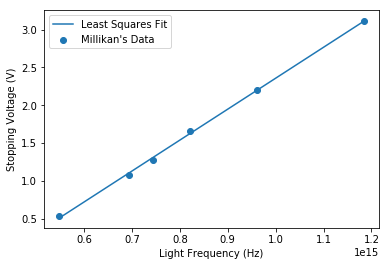

m =  4.08822735852e-15
c =  -1.73123580398


In [4]:
from numpy import loadtxt
from pylab import scatter, show, plot, xlabel, ylabel

# This is the funciton for calcualting the various E values listed in the text.
# The arguements could be x, y, x**2, or x*y
def E (a):
    average = sum(a)/len(a)
    return average

# This loads the values from the given file and places them into two arrays,
# x and yExp (for the experimental y values)
values = loadtxt("millikan.txt",float)
x = values[: ,0]
yExp = values[: ,1]

# This cacluates the slope and intercept values of the line of best fit.
m = (E(x*yExp) - E(x)*E(yExp))/(E(x**2) - E(x)**2)
c = (E(x**2)*E(yExp) - E(x)*E(x*yExp))/(E(x**2) - E(x)**2)


# This creates a line of best fit from the slope and intercept calculated above
yLine = m*x + c

# This plots the experimental, and fitted data onto one plot, and labels the axes

scatter(x, yExp, label = "Millikan's Data")
plot(x, yLine, label = "Least Squares Fit")
xlabel("Light Frequency (Hz)")
ylabel("Stopping Voltage (V)")

plt.legend(loc = "best")
show()

print("m = ", m)
print("c = ", c)

In [5]:
# This calcualtes the experimental value for planks constant by dividing the
# slope by the elementary charge
plankExp = m * 1.602e-19
plankAccepted = 6.626e-34

# This cacluates the percent difference between the experimental and accepted
# values for planks constant
percentDiff = ((plankAccepted - plankExp) / plankAccepted) * 100
print ("Percent Difference = ", percentDiff, "%")

Percent Difference =  1.15695399419 %


## Part 2: Curve Fitting Tutorial:
Open the Jupyter Notebook CurveFit.ipynb and work through the plots and exercises.  It is a very complete set of information that you should remember to consult for this and other classes.  No need to memorize all of the functions.

You may want to read Part 3 (below) and jump back and forth between the tutorial and applying each step to Millikan's data.

### Submit nothing for this section - However this is a dense document - ask a lot of questions and add comments to the document to help you reuse the functions as you go.  
-----------------------------------------------------------------------------------------------

## Part 3: Fitting Millikan's Data 
Use your new found knowledge from the Curve Fitting Tutorial to fit Millikan's Data with the various fitting routines in the tutorial.  Since it is linear data, it is a great test case to get you started.  Try three cases:
    * polynomial fits
    * linear regression (from the mathematical library scipy)
    * curve fits - even though your data fits a straight line, it is worth trying

To distinguish your new fits from those in part 1, give your new fit coefficients names that match the fit type.  For instance, back in Part 1, I named my coefficients ```m``` and ```b```.  In this section, I named my polynomial fit coefficients ```m_poly```, ```b_poly```.

### Your solution to Part 3:
-----------------------------------------------------------------------------------------------

#### Polynomial Fit:

In [6]:
# Fits a (1-dim) linear line to the data
fit, cov = np.polyfit(x, yExp, 1,cov=True)

In [7]:
fit

array([  4.08822736e-15,  -1.73123580e+00])

In [8]:
mPoly = fit[0]
cPoly = fit[1]

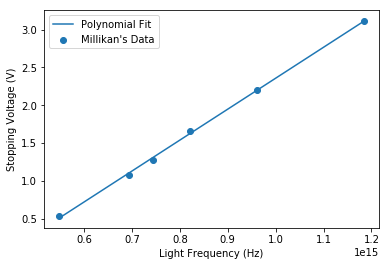

m =  4.08822735852e-15
c =  -1.73123580398


In [9]:
yLinePoly = mPoly * x + cPoly
scatter(x, yExp, label = "Millikan's Data")
plot(x, yLinePoly, label = "Polynomial Fit")
xlabel("Light Frequency (Hz)")
ylabel("Stopping Voltage (V)")

plt.legend(loc = "best")
show()
print("m = ", mPoly)
print("c = ", cPoly)

In [12]:
# This calculates the range of error in the slope and y-intercept
dm = np.sqrt(cov[0,0])
dc = np.sqrt(cov[1,1])
print("dm = ", dm, "dc = ", dc)

dm =  7.43032057894e-17 dc =  0.0631511865925


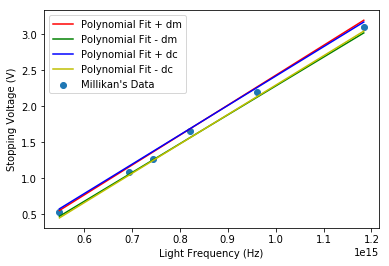

In [13]:
# This plots the range of error for the polynomial fit 
scatter(x, yExp, label = "Millikan's Data")
plot(x,(mPoly+dm)*x + c,"r", label = "Polynomial Fit + dm")
plot(x,(mPoly-dm)*x + c,"g", label = "Polynomial Fit - dm")
plot(x,mPoly*x + c + dc,"b", label = "Polynomial Fit + dc")
plot(x,mPoly*x + c - dc,"y", label = "Polynomial Fit - dc")
xlabel("Light Frequency (Hz)")
ylabel("Stopping Voltage (V)")
plt.legend(loc = "best")
show()

#### Linear Regression

In [15]:
from scipy.stats import linregress

In [16]:
# This calculates the linear regression of the data
regresFit = linregress(x,yExp)
regresFit

LinregressResult(slope=4.0882273585175089e-15, intercept=-1.7312358039813545, rvalue=0.9996698358621483, pvalue=1.6349454155977464e-07, stderr=5.2540300677609806e-17)

In [17]:
mLinReg = regresFit[0]
cLinReg = regresFit[1]
stdDev = regresFit[4]

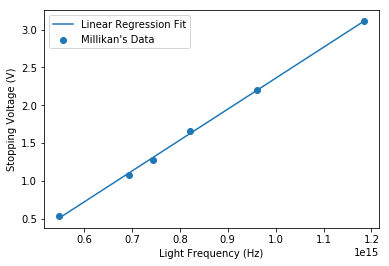

m =  4.08822735852e-15
c =  -1.73123580398
std. dev. =  5.25403006776e-17


In [18]:
yLineLinReg = mLinReg * x + cLinReg
scatter(x, yExp, label = "Millikan's Data")
plot(x, yLineLinReg, label = "Linear Regression Fit")
xlabel("Light Frequency (Hz)")
ylabel("Stopping Voltage (V)")
plt.legend(loc = "best")
show()

print("m = ", mLinReg)
print("c = ", cLinReg)
print("std. dev. = ", stdDev)

#### Curve Fit

In [19]:
from scipy.optimize import curve_fit

In [20]:
# This function returns the expected fit. In this case, we expect the data to be linear.
def expectedFit(x, a, b):
    return a * x + b

In [21]:
parameters, covariance = curve_fit(expectedFit, x, yExp)
parameters  #the fit results for a, b

array([  4.08822736e-15,  -1.73123580e+00])

In [23]:
mCurve = parameters[0]
cCurve = parameters[1]

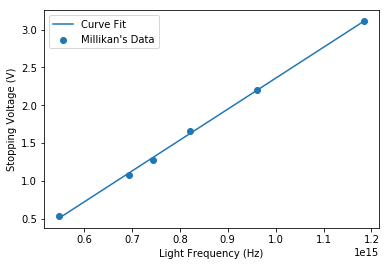

m =  4.08822735807e-15
c =  -1.73123580361


In [24]:
yLineCurve = mCurve * x + cCurve
scatter(x, yExp,label = "Millikan's Data")
plot(x, yLineCurve, label = "Curve Fit")
xlabel("Light Frequency (Hz)")
ylabel("Stopping Voltage (V)")
plt.legend(loc = "best")
show()

print("m = ", mCurve)
print("c = ", cCurve)

## Part 4: Fitting Projectile Motion Data

1.  Generate some 1D projectile motion data.  You are encouraged to use the function provided in Weekly Session 2. 

2. Add some "noise" to the data with a random variable. Plot the original function (without noise) and the noisy "data" with the scatter() function.  Use some of the tips/tricks on modifying scatter plots that are linked in Weekly Session 2.
3. Note that you have two plots to make - $x$ vs. $t$ and $v$ vs. $t$. Use this [link](https://matplotlib.org/gallery/subplots_axes_and_figures/subplot.html#sphx-glr-gallery-subplots-axes-and-figures-subplot-py) to learn how to make subplots.

4. Perform a curve fit to your noisy "data" and anaylze the error in the fit (i.e. the difference between the fit result and the original (noiseless) function. Compare the fit parameters to your original parameters using the standard deviation in the fit parameters. How close does the fit get to your original parameters? Repeat the analysis to generate new random data and compare again.

### Your solution to Part 4:
-----------------------------------------------------------------------------------------------

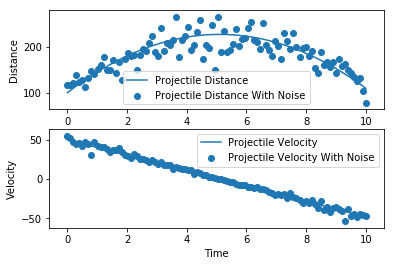

In [25]:
from numpy import linspace
def position(t, a, v_i=50, x_i=100):
    x=x_i+v_i*t+0.5*a*t**2
    v=v_i+a*t
    return x,v

time = linspace(0, 10, 100)
distance, velocity = position(time, -9.81)
distanceNoise = distance * (1.0 + 0.1*np.random.normal(size = len(time)))
velocityNoise = velocity * (1.0 + 0.1*np.random.normal(size = len(time)))

plt.subplot(2,1,1)
plot(time,distance,label = "Projectile Distance")
scatter(time,distanceNoise,label = "Projectile Distance With Noise")
xlabel("Time")
ylabel("Distance")
plt.legend(loc = "best")

plt.subplot(2,1,2)
plot(time,velocity,label = "Projectile Velocity")
scatter(time,velocityNoise,label = "Projectile Velocity With Noise")
xlabel("Time")
ylabel("Velocity")
plt.legend(loc = "best")

In [26]:
def expectedDistance(x, a, b, c):
    return a * x**2  + b * x + c
def expectedVelocity(x, a, b):
    return a * x + b

pDistance, covariance = curve_fit(expectedDistance, time, distanceNoise)
pVelocity, covariance = curve_fit(expectedVelocity, time, velocityNoise)
print(pDistance, pVelocity)

[  -4.29644963   44.08107978  106.66484669] [ -9.96592792  50.95570338]


In [27]:
expected_xi = 100
expected_vi = 50
expected_a = -9.81
calculated_xi = pDistance[2]
calculated_vi1 = pDistance[1]
calculated_vi2 = pVelocity[1]
calculated_a1 = pDistance[0]*2
calculated_a2 = pVelocity[0]
print("Expected starting position: ", expected_xi, "Expected starting velocity: ", expected_vi,"Expected acceleration: ", expected_a,)
print("Calculated starting position: ", calculated_xi, "Calculated starting velocity: ", calculated_vi1, calculated_vi2, "Calculated acceleration: ", calculated_a1, calculated_a2,)

Expected starting position:  100 Expected starting velocity:  50 Expected acceleration:  -9.81
Calculated starting position:  106.664846687 Calculated starting velocity:  44.0810797786 50.955703383 Calculated acceleration:  -8.5928992513 -9.96592791652


In [28]:
regresFitD = linregress(time,distanceNoise)
regresFitV = linregress(time,velocityNoise)
stdDevD = regresFitD[4]
stdDevV = regresFitV[4]
print(stdDevD,stdDevV)

1.34923850313 0.0946337564552


## Post lab questions

Describe briefly Millikan's experiment in your own words.  Be sure to explain these two main points.

1.  What is $\nu$, and why is it the independent variable in the experiment?  Did Millikan use $\nu$ in the           visible, infrared, or ultraviolet spectrum?  Here is a [reference](http://hyperphysics.phy-astr.gsu.edu/hbase/ems3.html) for light energies.
    
2.  What does $V$ measure, and why is it the dependent variable in the experiment?  
-----------------------------------------------------------------------------------------------

Using the photoelectric effect, Millikan provided data that supported Einstein's equation: V = (h/e) * v - p, and he calculated the value of plank's constant (h). To accomplish this, Millikan shined light of various frequencies onto metal in a vaccum chamber. He used a sharp knife to clean the surface of the metal before taking measurements, and he measured the kinetic energy of the electrons by relating it to the stopping potential, or the voltage required to stop electrons from flowing out of the metal. In Einstein's equation, V is the stopping potential, e is the elementary charge, v is the frequency of the light, and p is the work function, or the energy it takes to remove electrons from the surface of a metal. v is the independent variable, because light frequency is directly proportional to energy, and the energy of the light is transferred to the energy of the electrons. The energy of the electrons has an effect on the stopping potential, which is why V is the dependedt variable. Based on the data above, Millikan used infared light.

## With any remaining time 

* Play with "tricking out" your plots using the matplotlib gallery - which is one of my favorite places on the interwebs. Click on the [link](https://matplotlib.org/gallery/lines_bars_and_markers/scatter_with_legend.html#sphx-glr-gallery-lines-bars-and-markers-scatter-with-legend-py) and use it as a guide to modify your scatter plot.  Once you're done with that, play with the markers as well - you can change their shape! [link](https://matplotlib.org/gallery/lines_bars_and_markers/scatter_symbol.html#sphx-glr-gallery-lines-bars-and-markers-scatter-symbol-py)

* Work on HW6 - which includes finishing all of the exercises in Weekly Session 2